c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


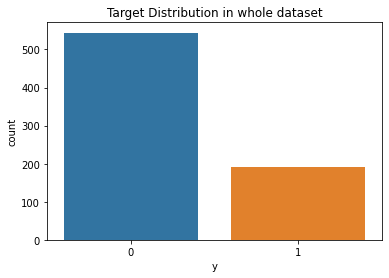

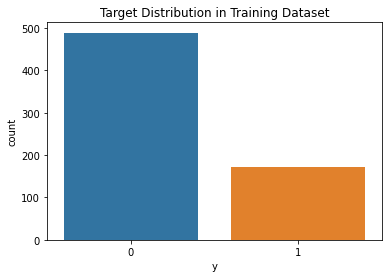

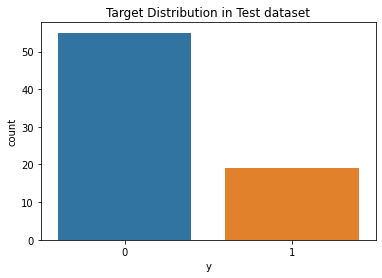

In [3]:
'''
This function generates the training and testing dataset to be used for training and testing purposes with various models respectively. 
'''
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

def generate_train_test_data(split = 0.1, random_state = 42, scaling = 'standard', sampling = False, show_plots = True):

	'''
	This method generates the training and test data. 
	Parameters :- split : Float, (0,1) - fraction of size of testing data to be used to test the model.
				  random_state : Integer - state of the randomization of the sampling data.
				  scaling : String, 'normal_negative', 'normal_positive', 'standard' - Type of scaling to be used, scaling data by 
				  																		[-1,1], [0,1], Standard Normal respectively
				  sampling : Boolean - To generate synthetic data using training data with SMOTE
				  show_plots : Boolean - To show target variable distribution after each sampling method.											
	'''

	data = pd.read_csv('raw.csv', index_col = [0])

	X = data[data.columns[0:100]]

	y = data['y']

	sns.countplot(y).set_title('Target Distribution in whole dataset')
	plt.show()

	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y, test_size = split)


	if scaling == 'normal_negative':
		scale = MinMaxScaler(feature_range = (-1,1))

	elif scaling == 'normal_positive':
		scale = MinMaxScaler()

	elif scaling == 'standard':
		scale = StandardScaler()

	if sampling == False:

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()

		return X_train, X_test, y_train, y_test

	else:

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset without SMOTE')
			plt.show()

		oversample = SMOTE()
		X_train, y_train = oversample.fit_resample(X_train, y_train)

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset with SMOTE')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()
		return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = generate_train_test_data()


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf
X_train.shape

(662, 100)

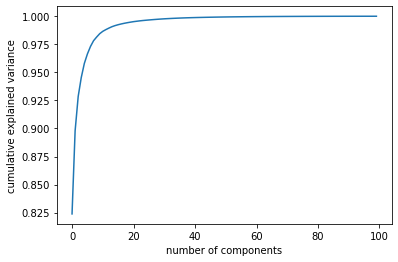

In [12]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [15]:
print(pca.explained_variance_ratio_)

[8.20613794e-01 7.63303624e-02 2.91968007e-02 1.63992150e-02
 1.33105402e-02 9.21672356e-03 7.05454458e-03 5.18460780e-03
 3.29124270e-03 3.16684538e-03 2.02514146e-03 1.51690199e-03
 1.50186650e-03 1.27547928e-03 9.60038853e-04 7.90640348e-04
 7.67631958e-04 6.93312034e-04 6.11185265e-04 5.37430713e-04
 4.53332022e-04 4.06004408e-04 3.79471550e-04 3.20517589e-04
 2.87565301e-04 2.55119146e-04 2.34992417e-04 2.31691952e-04
 2.13478999e-04 1.94519737e-04 1.83295126e-04 1.65160714e-04
 1.55150465e-04 1.41257724e-04 1.31402748e-04 1.24540797e-04
 1.12275978e-04 1.06027800e-04 9.49132895e-05 8.20571347e-05
 7.67554091e-05 7.12785772e-05 6.51424835e-05 6.34636817e-05
 5.83454528e-05 5.74030587e-05 5.26742209e-05 5.03962993e-05
 4.79102871e-05 4.73020181e-05 4.58322234e-05 4.40275441e-05
 3.81666178e-05 3.38078172e-05 3.28104521e-05 2.88804719e-05
 2.76964547e-05 2.70210028e-05 2.60654557e-05 2.53978727e-05
 2.34666166e-05 2.10630204e-05 1.93224476e-05 1.85333194e-05
 1.84265657e-05 1.639437

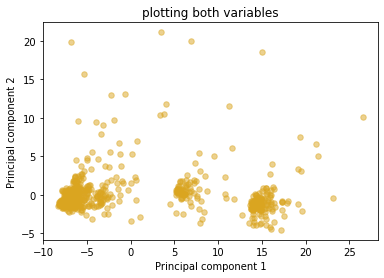

In [16]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=30,c='goldenrod',alpha=0.5)
plt.title('plotting both variables')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()


c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


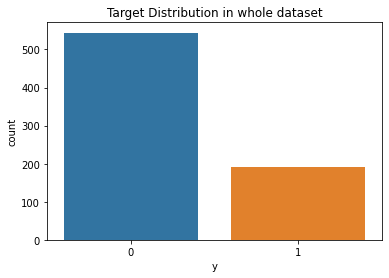

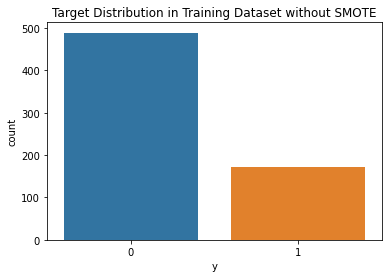

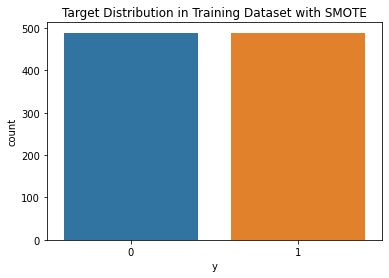

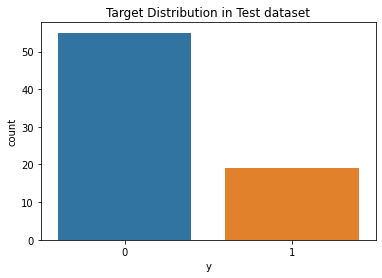

In [18]:
X_train, X_test, y_train, y_test = generate_train_test_data(sampling = True)

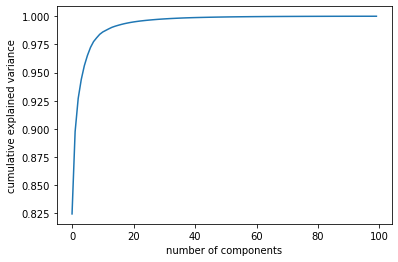

In [19]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [20]:
print(pca.explained_variance_ratio_)

[8.24416024e-01 7.30609283e-02 2.95281076e-02 1.68368808e-02
 1.22495605e-02 9.01516141e-03 7.17764290e-03 5.18990616e-03
 3.37296687e-03 3.09298317e-03 2.09236041e-03 1.43842806e-03
 1.41276156e-03 1.30178383e-03 9.51896435e-04 8.17397505e-04
 7.49565134e-04 6.77957689e-04 5.69841214e-04 5.27074917e-04
 4.55185346e-04 3.99989066e-04 3.61621157e-04 3.12797826e-04
 2.99995389e-04 2.60797499e-04 2.43040433e-04 2.32542034e-04
 2.16736757e-04 1.91423817e-04 1.79530926e-04 1.62986803e-04
 1.52373185e-04 1.36392195e-04 1.29790693e-04 1.21921906e-04
 1.15360302e-04 1.04959836e-04 8.96798123e-05 8.49414322e-05
 7.75106082e-05 6.68863993e-05 6.58867124e-05 6.44149046e-05
 5.90314744e-05 5.74547540e-05 5.33225221e-05 5.02338415e-05
 4.73146234e-05 4.52114075e-05 4.51080685e-05 4.23324125e-05
 3.83231417e-05 3.34768654e-05 3.03544830e-05 3.00491399e-05
 2.84729280e-05 2.68055171e-05 2.54451348e-05 2.43413819e-05
 2.31407589e-05 1.98153033e-05 1.85871642e-05 1.81584266e-05
 1.81279133e-05 1.656673

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf
X_train.shape

(978, 100)

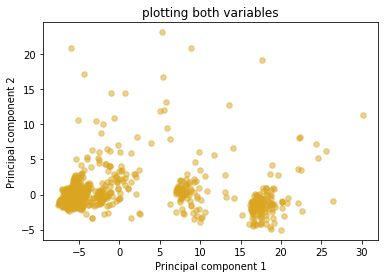

In [22]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=30,c='goldenrod',alpha=0.5)
plt.title('plotting both variables')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()